## Analyzing Google Play Store.

- App               - Name of Apps.
- Category          - Apps Category.
- Rating            - Apps Rating.
- Reviews           - Apps Reviews.
- Size              - Apps Size.
- Installs          - Number of Installation.
- Type              - Free or Paid.
- rice             - Price of Apps.
- Content Rating    - Target Group.
- Genres            - Apps Genres.
- Last Updated      - Apps last updated Date.
- Current Ver       - Apps current version. 
- Android Ver       - OS version to support Apps.  


## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Knowing Dataset

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Cleaning Dataset

#### Task 1:  Columns name with Lower case

In [7]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content rating', 'genres', 'last updated', 'current ver',
       'android ver'],
      dtype='object')

#### Task 2: Change column date type to numrical.

Below columns contains the numerical data type but in the form of object. In this task will be change it into interger/float dtypes.

But we change it's datatyep, we will remove and replace data where it is necessary.

In [8]:
df[['rating','reviews','size','installs','price','current ver', 'android ver']]

,rating,reviews,size,installs,price,current ver,android ver
0,4.1,159,19M,"10,000+",0,1.0.0,4.0.3 and up
1,3.9,967,14M,"500,000+",0,2.0.0,4.0.3 and up
2,4.7,87510,8.7M,"5,000,000+",0,1.2.4,4.0.3 and up
3,4.5,215644,25M,"50,000,000+",0,Varies with device,4.2 and up
4,4.3,967,2.8M,"100,000+",0,1.1,4.4 and up
...,...,...,...,...,...,...,...
10836,4.5,38,53M,"5,000+",0,1.48,4.1 and up
10837,5.0,4,3.6M,100+,0,1.0,4.1 and up
10838,NaN,3,9.5M,"1,000+",0,1.0,2.2 and up
10839,4.5,114,Varies with device,"1,000+",0,Varies with device,Varies with device


#### Rating column.

In [33]:
df['rating'] = df['rating'].fillna(0).astype(float)
df['rating'] = df['rating'].apply(lambda x : df['rating'].mean() if x == 0 else x)

#### Reviews column.

In [10]:
df[df['reviews'].str.contains('[A-Z]', flags=re.I)]

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As you can see, at index 10472, there is 3.0M reviews. Which can't be true. With careful observation we can see that, the apps category type is missing in this row and other columns value is push to the next left column.

If we check this particular apps in Google play station.It's fall under 'Lifestyle' category.

Now, We will update with category and other respected columns. 

In [11]:
result  = df.iloc[10472].values.tolist()
result.insert(1, 'Lifestyle')
result.pop()
df.iloc[10472] = result
df.iloc[10472]

app               Life Made WI-Fi Touchscreen Photo Frame
category                                        Lifestyle
rating                                                1.9
reviews                                                19
size                                                 3.0M
installs                                           1,000+
type                                                 Free
price                                                   0
content rating                                   Everyone
genres                                                NaN
last updated                            February 11, 2018
current ver                                        1.0.19
android ver                                    4.0 and up
Name: 10472, dtype: object

In [12]:
df['reviews'] = df['reviews'].astype(int)

#### Size column

In 'size' columns. There is no specific size for few apps. Of this analysis purpose we will consider those apps having 10.0M size.

In [13]:
df['size'] = df['size'].apply(lambda x : '10.0' if x == 'Varies with device' else x.replace('M', ""))
df['size'] = df['size'].apply(lambda x : x.replace('K', ""))
df['size'] = df['size'].apply(lambda x : x.replace('k', ""))
df['size'] = df['size'].astype(float)

#### Installs Column.

In [14]:
df['installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [15]:
df['installs'] = df['installs'].apply(lambda x : x.replace('+', ''))
df['installs'] = df['installs'].apply(lambda x : x.replace(',', ''))
df['installs'] = df['installs'].astype(int)

In [16]:
df['installs'] = df.installs / 1000000 # Normalizing in terem of Million.

#### Price column.

In [17]:
df['price'] = df['price'].apply(lambda x : x.replace('$', ''))
df['price'] = df['price'].astype(float)

In [18]:
df['price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

## Data Analysing

####  Task 1: Dublicate apps

Here we will find the all the dublicate apps name. We will keep the unique apps with highest reviews for each.

In [19]:
apps = df.app
dublicate_apps = []
unique_apps = []

for each in apps:
    if each in unique_apps:
        dublicate_apps.append(each)
    else:
        unique_apps.append(each)
        
print('Total Dublicate apps : ', len(dublicate_apps))
print('Total unique apps : ', len(unique_apps))

Total Dublicate apps :  1181
Total unique apps :  9660


Before removing dublicate apps. We want to find unique apps with higest reviews.

In [20]:
reviews_max = {}

Google_clean = []
Google_already_added = []

for index, value in df.iterrows():
    result = value.tolist()
    app_name = result[0]
    app_reviews = result[3]
    
    if app_name in reviews_max and reviews_max[app_name] < app_reviews:
            reviews_max[app_name] = app_reviews
    elif app_name not in reviews_max:
            reviews_max[app_name] = app_reviews

    if reviews_max[app_name] == app_reviews and (app_name not in Google_already_added):
        Google_clean.append(value)
        Google_already_added.append(app_name)

In [21]:
df = pd.DataFrame(Google_clean, index = range(len(Google_clean)))
print('Total columns: ', len(df))

Total columns:  9660


Finally, We managed to remove the dublicate apps from dataset. We dataset has be assigned with unique 9960 rows. 

#### Task 2: English vs Foreign apps

Here, We will find out how many apps are for English audience Vs Foreign audience.

We will check first 3 letters of apps. If first 3 letters are not english standard character then we will consider them as foreign apps.

In [22]:
def check_character(string):
    non_english_character = 0
    
    for character in string:
        if ord(character) > 127:
            non_english_character += 1
    
    if non_english_character > 3:
        return False
    else:
        return True

df['app_origin'] = df['app'].apply(lambda x : 'English' if check_character(x) else 'Foreign')

In [23]:
df.app_origin.value_counts()

English    9615
Foreign      45
Name: app_origin, dtype: int64

In [24]:
df.loc[df['app_origin']=='Foreign'].head()

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver,app_origin
583,Flame - درب عقلك يوميا,EDUCATION,4.6,56065,37.0,1.000,Free,0.0,Everyone,Education,"July 26, 2018",3.3,4.1 and up,Foreign
1304,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225,15.0,0.100,Free,0.0,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up,Foreign
2991,РИА Новости,NEWS_AND_MAGAZINES,4.5,44274,8.0,1.000,Free,0.0,Everyone,News & Magazines,"August 6, 2018",4.0.6,4.4 and up,Foreign
3323,صور حرف H,ART_AND_DESIGN,4.4,13,4.5,0.001,Free,0.0,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up,Foreign
3431,"L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰,...",LIFESTYLE,4,45224,49.0,5.000,Free,0.0,Everyone,Lifestyle,"August 1, 2018",6.5.1,4.1 and up,Foreign


There are 45 Foreign apps in google play store.

#### Task 4: Most Common Apps.

In [25]:
cats = df.category.value_counts()
cats

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Lifestyle                 1
Name: category, dtype: int64

Family, Game and Tools are top 3 where as Comics, Beauty and Lifestyle are least 3.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

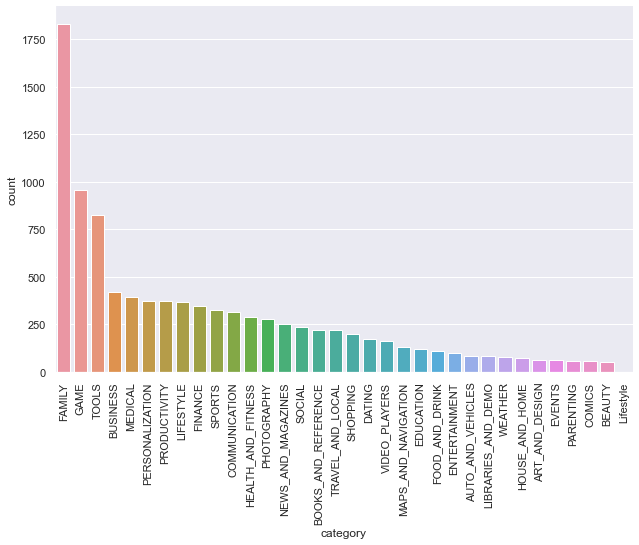

In [26]:
g = sns.catplot(x='category', kind='count', data=df, order=df.category.value_counts().index)

g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xticks(rotation=90)

#### Task 5: Apps rating.

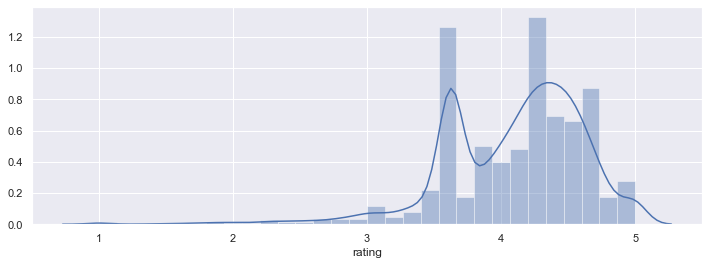

In [34]:
fig = plt.figure(figsize=(12,4))
sns.distplot(df.rating, bins=30)

In [35]:
df.groupby('category')['rating'].mean().sort_values(ascending=False).head()

category
EDUCATION         4.358178
ART_AND_DESIGN    4.322962
GAME              4.216778
EVENTS            4.194384
WEATHER           4.188131
Name: rating, dtype: float64

On average rating: Education, Art_and_Design and Game are on the top.

#### Task 6: Paid and Free Apps.

In [36]:
app_type = df.type.value_counts()
print('Total' ,app_type.index[0], ":" , app_type.values[0])
print('Total' ,app_type.index[1], ":" , app_type.values[1])

Total Free : 8903
Total Paid : 756


We can see that Google Play Store is dominated by Free Apps.

In [37]:
Free_apps = df[(df['type'] == 'Free') & (df['installs']>100)][['app','category','installs']].sort_values(by='installs', ascending=False)
Free_apps # Free apps install more than 100 Millions and their category.

,app,category,installs
152,Google Play Books,BOOKS_AND_REFERENCE,1000.0
1356,Subway Surfers,GAME,1000.0
2977,Google News,NEWS_AND_MAGAZINES,1000.0
2930,Google Play Movies & TV,VIDEO_PLAYERS,1000.0
2908,YouTube,VIDEO_PLAYERS,1000.0
2720,Google Drive,PRODUCTIVITY,1000.0
2507,Google,TOOLS,1000.0
2429,Google Street View,TRAVEL_AND_LOCAL,1000.0
2420,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,1000.0
2191,Google Photos,PHOTOGRAPHY,1000.0


In [38]:
Free_apps['category'].value_counts()

COMMUNICATION          11
TOOLS                   6
PRODUCTIVITY            5
SOCIAL                  5
GAME                    5
NEWS_AND_MAGAZINES      3
VIDEO_PLAYERS           3
TRAVEL_AND_LOCAL        2
PHOTOGRAPHY             1
HEALTH_AND_FITNESS      1
ENTERTAINMENT           1
BOOKS_AND_REFERENCE     1
Name: category, dtype: int64

Communication apps like WhatApps, Messanger, viber has been downloaded and installed.

In [39]:
Paid_apps = df[(df['type'] == 'Paid')][['app','category','installs']].sort_values(by='installs', ascending=False)
Paid_apps

,app,category,installs
3208,Hitman Sniper,GAME,10.0
1743,Minecraft,FAMILY,10.0
4650,Five Nights at Freddy's,GAME,1.0
7743,Bloons TD 5,FAMILY,1.0
2675,HD Widgets,PERSONALIZATION,1.0
...,...,...,...
4522,AP Series Solution Pro,FAMILY,0.0
8780,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,0.0
8216,EG | Explore Folegandros,TRAVEL_AND_LOCAL,0.0
5661,cronometra-br,PRODUCTIVITY,0.0


In [40]:
Paid_apps['category'].value_counts()

FAMILY                 183
MEDICAL                 83
GAME                    82
PERSONALIZATION         81
TOOLS                   78
BOOKS_AND_REFERENCE     28
PRODUCTIVITY            28
COMMUNICATION           27
SPORTS                  24
PHOTOGRAPHY             19
LIFESTYLE               19
FINANCE                 17
HEALTH_AND_FITNESS      15
TRAVEL_AND_LOCAL        12
BUSINESS                12
WEATHER                  8
DATING                   6
MAPS_AND_NAVIGATION      5
EDUCATION                4
VIDEO_PLAYERS            4
SOCIAL                   3
AUTO_AND_VEHICLES        3
ART_AND_DESIGN           3
NEWS_AND_MAGAZINES       2
SHOPPING                 2
PARENTING                2
FOOD_AND_DRINK           2
ENTERTAINMENT            2
LIBRARIES_AND_DEMO       1
EVENTS                   1
Name: category, dtype: int64

Family Category paid apps like Minecraft, Bloons TD 5 are quite famous in Google Play Store.

#### Task 7: Most Popular Apps by Category.

In [41]:
df.groupby('category')['installs'].sum().sort_values(ascending=False)

category
GAME                   13878.924415
COMMUNICATION          11038.276251
TOOLS                   8001.771915
PRODUCTIVITY            5793.091369
SOCIAL                  5487.867902
PHOTOGRAPHY             4649.147655
FAMILY                  4427.941505
VIDEO_PLAYERS           3926.902720
TRAVEL_AND_LOCAL        2894.887146
NEWS_AND_MAGAZINES      2369.217760
ENTERTAINMENT           2113.660000
BOOKS_AND_REFERENCE     1665.969576
PERSONALIZATION         1532.494782
SHOPPING                1400.348785
HEALTH_AND_FITNESS      1144.022512
SPORTS                  1096.474498
BUSINESS                 697.164865
LIFESTYLE                503.823539
MAPS_AND_NAVIGATION      503.281890
FINANCE                  455.348734
WEATHER                  361.100520
EDUCATION                352.952000
FOOD_AND_DRINK           211.798751
DATING                   140.926107
ART_AND_DESIGN           114.338100
HOUSE_AND_HOME            97.212461
AUTO_AND_VEHICLES         53.130211
LIBRARIES_AND_DEMO 

In [42]:
df[(df['category'] == 'GAME') & (df['installs'] > 100)][['app','installs']] # Game Category

,app,installs
1356,Subway Surfers,1000.0
1357,Candy Crush Saga,500.0
1363,Temple Run 2,500.0
1364,Pou,500.0
1410,My Talking Tom,500.0


In [43]:
df[(df['category'] == 'COMMUNICATION') & (df['installs'] > 100)][['app','installs']].sort_values(by='installs', ascending=False) # ommuniction Category

,app,installs
299,Messenger – Text and Video Chat for Free,1000.0
300,WhatsApp Messenger,1000.0
302,Google Chrome: Fast & Secure,1000.0
304,Gmail,1000.0
305,Hangouts,1000.0
349,Skype - free IM & video calls,1000.0
306,Viber Messenger,500.0
311,imo free video calls and chat,500.0
335,Google Duo - High Quality Video Calls,500.0
342,UC Browser - Fast Download Private & Secure,500.0


In [44]:
df[(df['category'] == 'TOOLS') & (df['installs'] > 100)][['app','installs']] # Tools Category.

,app,installs
2507,Google,1000.0
2508,Google Translate,500.0
2527,SHAREit - Transfer & Share,500.0
2537,Gboard - the Google Keyboard,500.0
3181,Clean Master- Space Cleaner & Antivirus,500.0
6486,"Security Master - Antivirus, VPN, AppLock, Boo...",500.0


From the above observation, Game category have the most installs: 13878.924415 Milliions followed by communication and tool with 11038.276251 and 8001.771915 Millions.

## Conclusions

In this Dataset, we analyzed data about Google Play Store.

We concluded that Game category apps are quite famous and doing well. If some developer or company 
wants to invest in mobile apps. Game genera might be the good choice for profit.
